# 6.6 Sourcing and Analyzing Time Series Data

### This script contains the following:
##### 1. Importing your libraries and data
##### 2. Subsetting, wrangling, and cleaning time-series data
##### 3. Time series analysis: decomposition
##### 4. Testing for stationarity
##### 5. Stationarizing the Data (if required)

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings
from pathlib import Path


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# Creating a path to import dataframe

path = r'/Users/shailioza/Documents/CareerFoundry Projects'

In [3]:
# Importing Dataframe 

df = pd.read_csv(os.path.join(path, 'pollution_clean.csv'))

In [4]:
df.head()

,Unnamed: 0,Date,Year,Month,Day,Address,State,County,City,O3 Mean,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,0,2000-01-01,2000,1,1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,1,2000-01-02,2000,1,2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2,2000-01-03,2000,1,3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,3,2000-01-04,2000,1,4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,4,2000-01-05,2000,1,5,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


In [5]:
## Aggregate daily data to monthly data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
monthly_data = df.resample('M').mean()
monthly_data['YearMonth'] = monthly_data.index.strftime('%Y-%m')
# monthly_data.reset_index(inplace=True)


In [6]:
# Drop specific unnecesary columns
columns_to_drop = ['Unnamed: 0']
monthly_data.drop(columns_to_drop, axis=1, inplace=True)

In [7]:
monthly_data.head()

,Year,Month,Day,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,YearMonth
Date,,,,,,,,,,,,,,,,,,,,
2000-01-31,2000.0,1.0,16.118017,0.014521,0.022655,11.068450,21.075531,0.948309,1.491817,9.483084,16.929190,3.866951,9.027537,9.472069,12.757671,23.425019,40.276947,12.788356,36.715185,2000-01
2000-02-29,2000.0,2.0,14.895746,0.021125,0.030935,11.602168,29.056714,0.715586,1.118182,8.884070,12.724771,3.426367,8.474229,8.849875,11.908257,20.960138,37.872394,12.495413,35.140951,2000-02
2000-03-31,2000.0,3.0,16.300063,0.027074,0.038355,11.097915,36.605180,0.537657,0.836513,7.970941,9.527479,3.161874,8.684965,9.202148,12.202780,17.715628,34.139608,12.715730,32.344283,2000-03
2000-04-30,2000.0,4.0,15.586100,0.030665,0.042421,11.188136,42.111996,0.469062,0.687162,7.468792,7.823816,3.377199,10.028331,9.422311,14.050907,16.140980,32.683046,11.623285,30.946879,2000-04
2000-05-31,2000.0,5.0,16.091484,0.034551,0.047726,10.857504,51.791737,0.421474,0.578583,6.804384,6.618044,3.389836,10.109191,8.779933,14.156830,15.031685,30.501012,11.502108,28.838111,2000-05


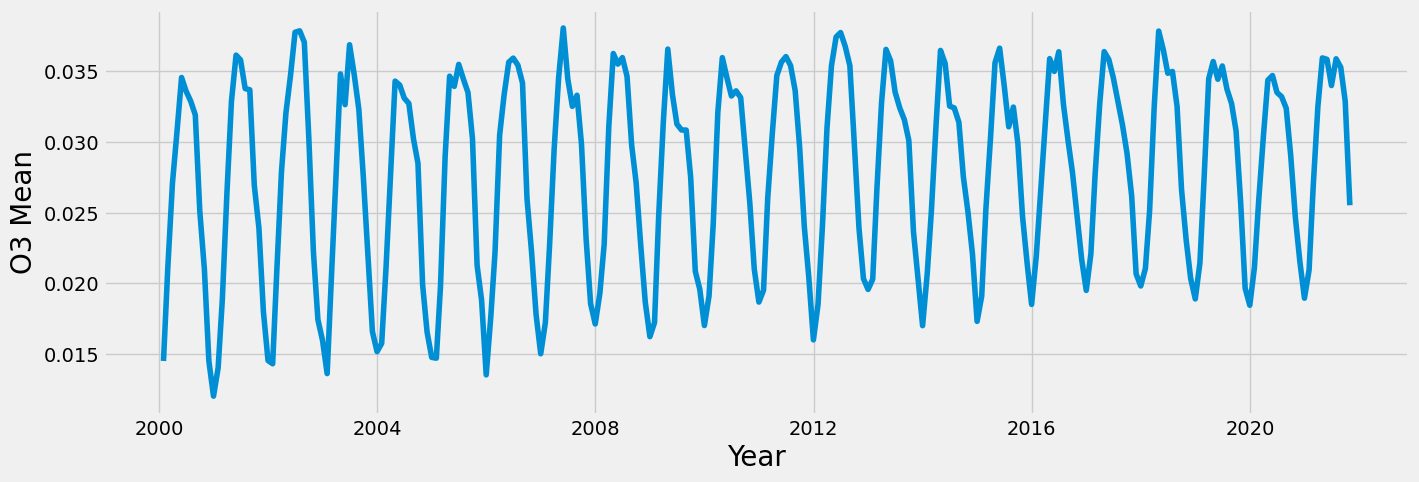

In [8]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.xlabel('Year', fontsize=20)
plt.ylabel('O3 Mean', fontsize=20)

plt.plot(monthly_data['O3 Mean'])

In [9]:
# check for missing values
monthly_data.isnull().sum()

Year                 0
Month                0
Day                  0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
YearMonth            0
dtype: int64

##### No missing values 

In [10]:
# Check for duplicates.

dups = monthly_data.duplicated()
dups.sum()


0

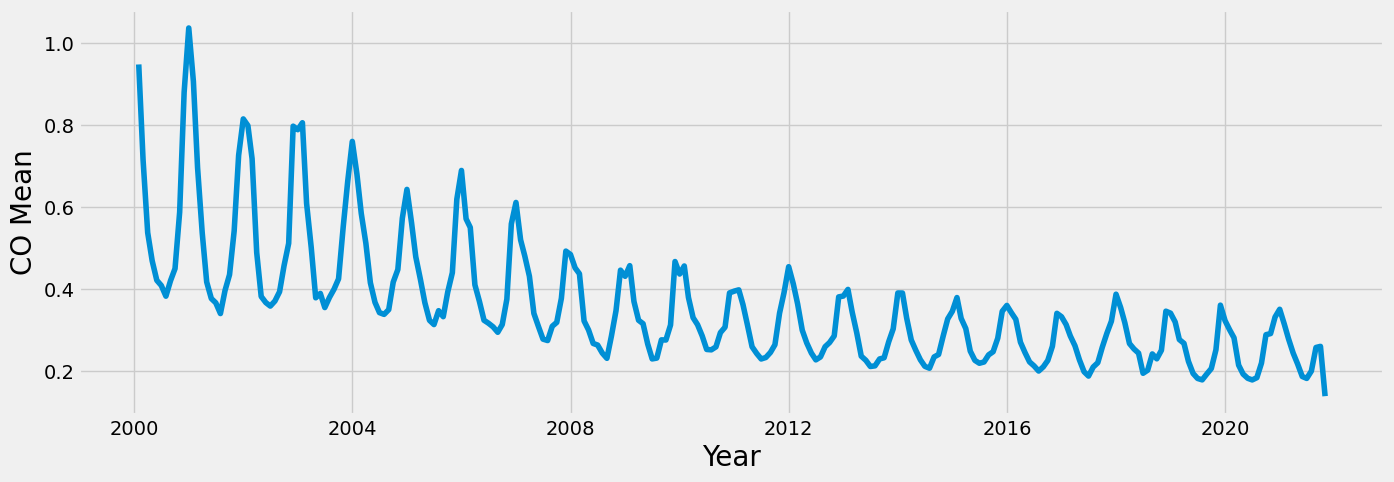

In [11]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.xlabel('Year', fontsize=20)
plt.ylabel('CO Mean', fontsize=20)

plt.plot(monthly_data['CO Mean'])


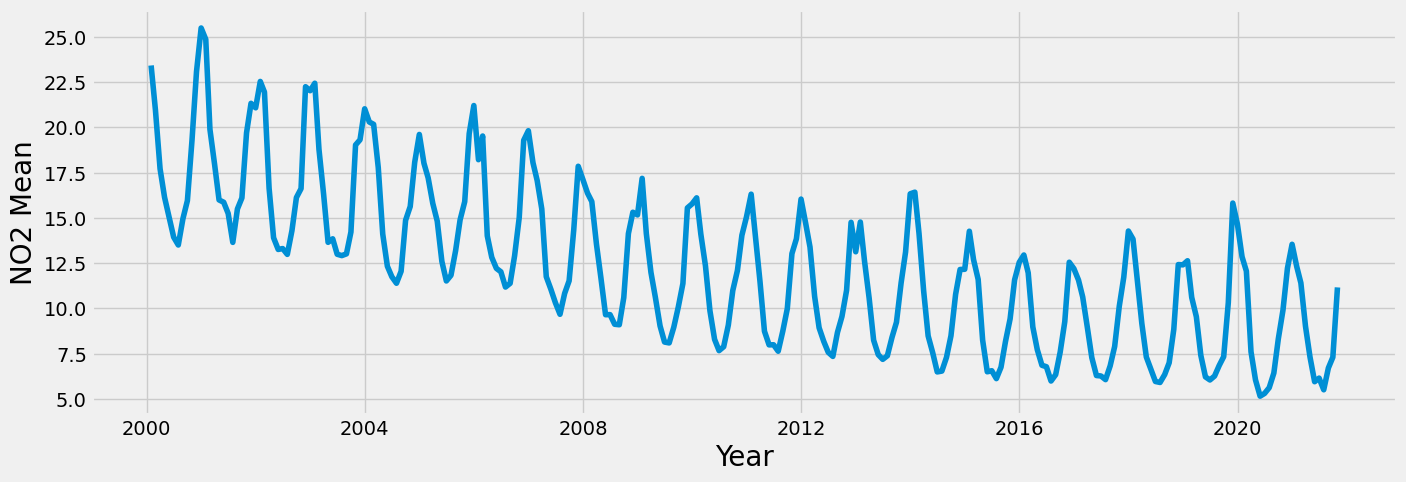

In [12]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.xlabel('Year', fontsize=20)
plt.ylabel('NO2 Mean', fontsize=20)

plt.plot(monthly_data['NO2 Mean'])

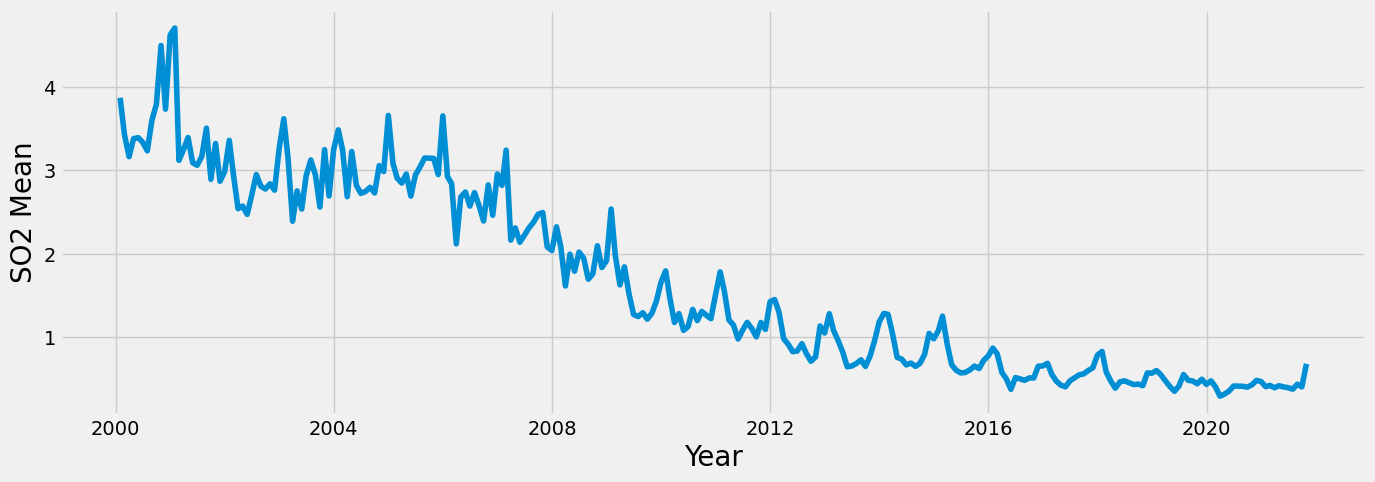

In [13]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.xlabel('Year', fontsize=20)
plt.ylabel('SO2 Mean', fontsize=20)

plt.plot(monthly_data['SO2 Mean'])

# 3. Time-series analysis: decomposition

In [14]:
# Create a subset for O3 Mean from the data.
df_2=monthly_data
df_2=monthly_data.iloc[:,[1,3]]

In [15]:
columns_to_drop = ['Month']
df_2.drop(columns_to_drop, axis=1, inplace=True)

In [16]:
df_2

,O3 Mean
Date,
2000-01-31,0.014521
2000-02-29,0.021125
2000-03-31,0.027074
2000-04-30,0.030665
2000-05-31,0.034551
...,...
2021-06-30,0.033982
2021-07-31,0.035871
2021-08-31,0.035273


In [17]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_2, model='additive')

In [18]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

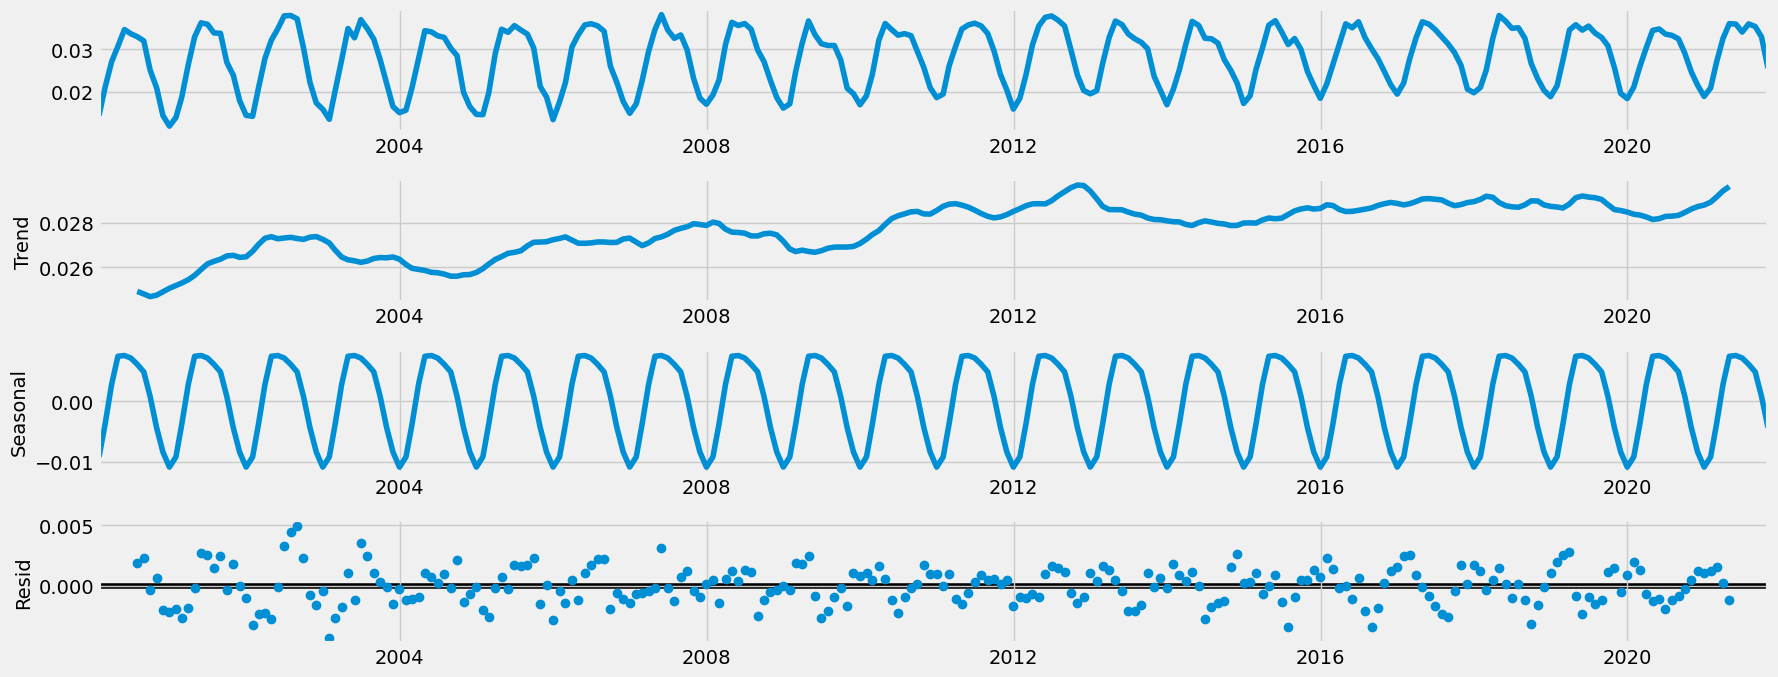

In [19]:
# Plot the separate components

decomposition.plot()
plt.show()

In [20]:
# Create a subset for CO Mean from the data.
df_3=monthly_data
df_3=monthly_data.iloc[:,[7]]

In [21]:
df_3

,CO Mean
Date,
2000-01-31,0.948309
2000-02-29,0.715586
2000-03-31,0.537657
2000-04-30,0.469062
2000-05-31,0.421474
...,...
2021-06-30,0.182071
2021-07-31,0.199957
2021-08-31,0.257532


In [22]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_3, model='additive')

In [23]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

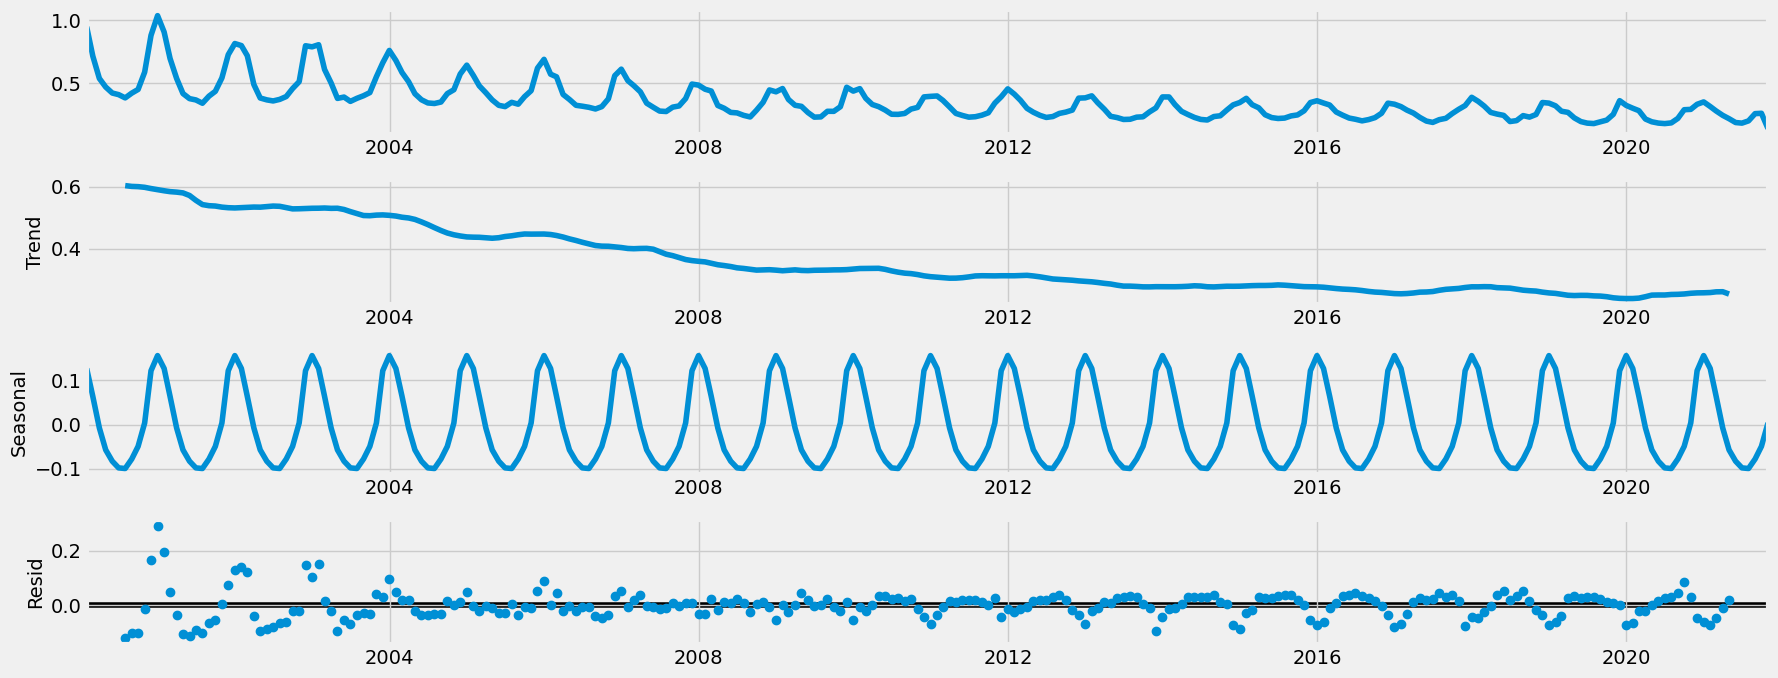

In [24]:
# Plot the separate components

decomposition.plot()
plt.show()

In [25]:
# Create a subset for SO2 Mean from the data.
df_4=monthly_data
df_4=monthly_data.iloc[:,[11]]

In [26]:
df_4

,SO2 Mean
Date,
2000-01-31,3.866951
2000-02-29,3.426367
2000-03-31,3.161874
2000-04-30,3.377199
2000-05-31,3.389836
...,...
2021-06-30,0.393158
2021-07-31,0.375108
2021-08-31,0.434501


In [27]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_4, model='additive')

In [28]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

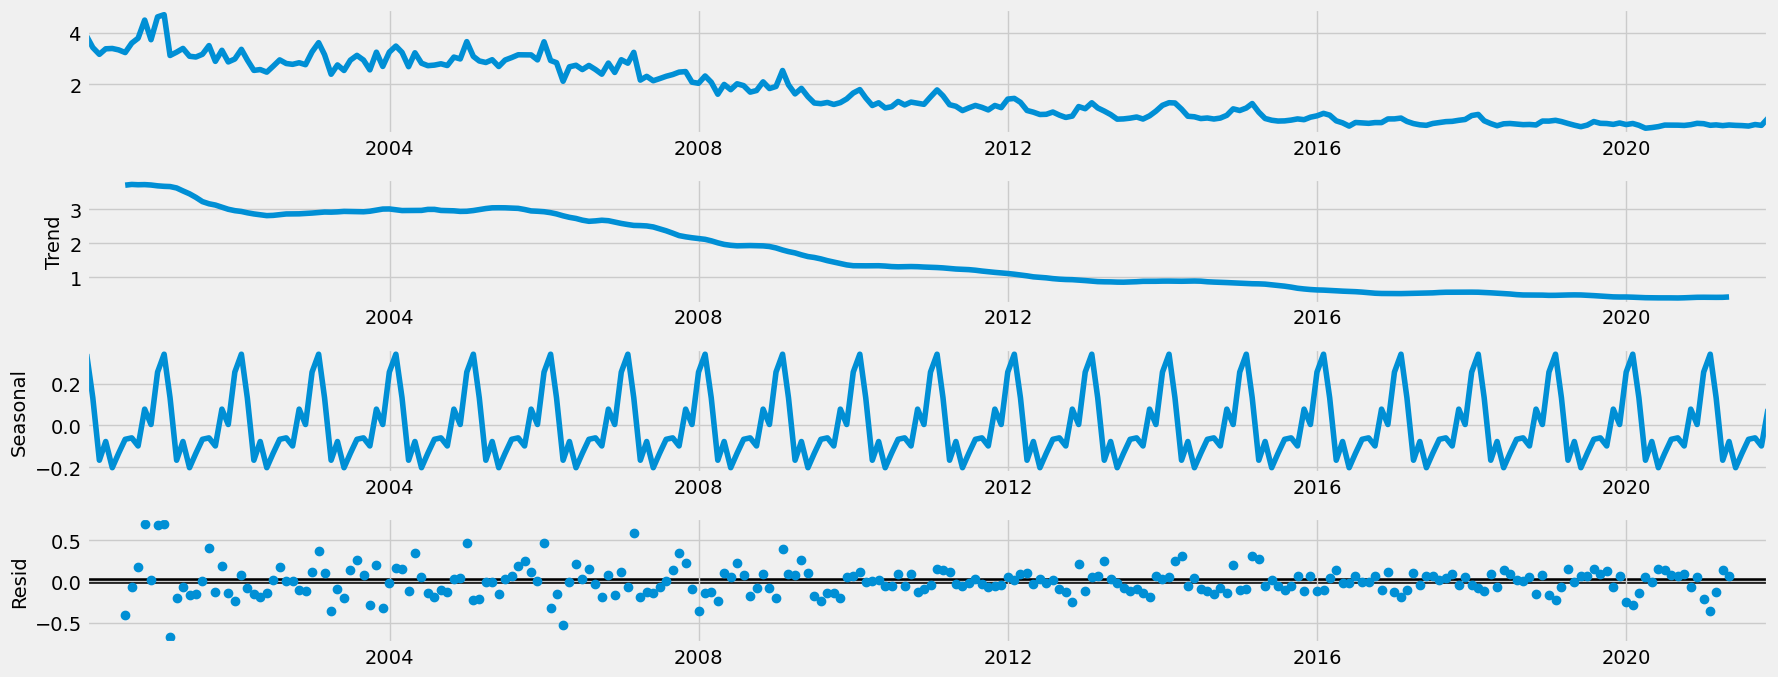

In [29]:
# Plot the separate components

decomposition.plot()
plt.show()

In [30]:
# Create a subset for NO2 Mean from the data.
df_5=monthly_data
df_5=monthly_data.iloc[:,[15]]

In [31]:
df_5

,NO2 Mean
Date,
2000-01-31,23.425019
2000-02-29,20.960138
2000-03-31,17.715628
2000-04-30,16.140980
2000-05-31,15.031685
...,...
2021-06-30,6.150413
2021-07-31,5.505882
2021-08-31,6.707735


In [32]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_5, model='additive')

In [33]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

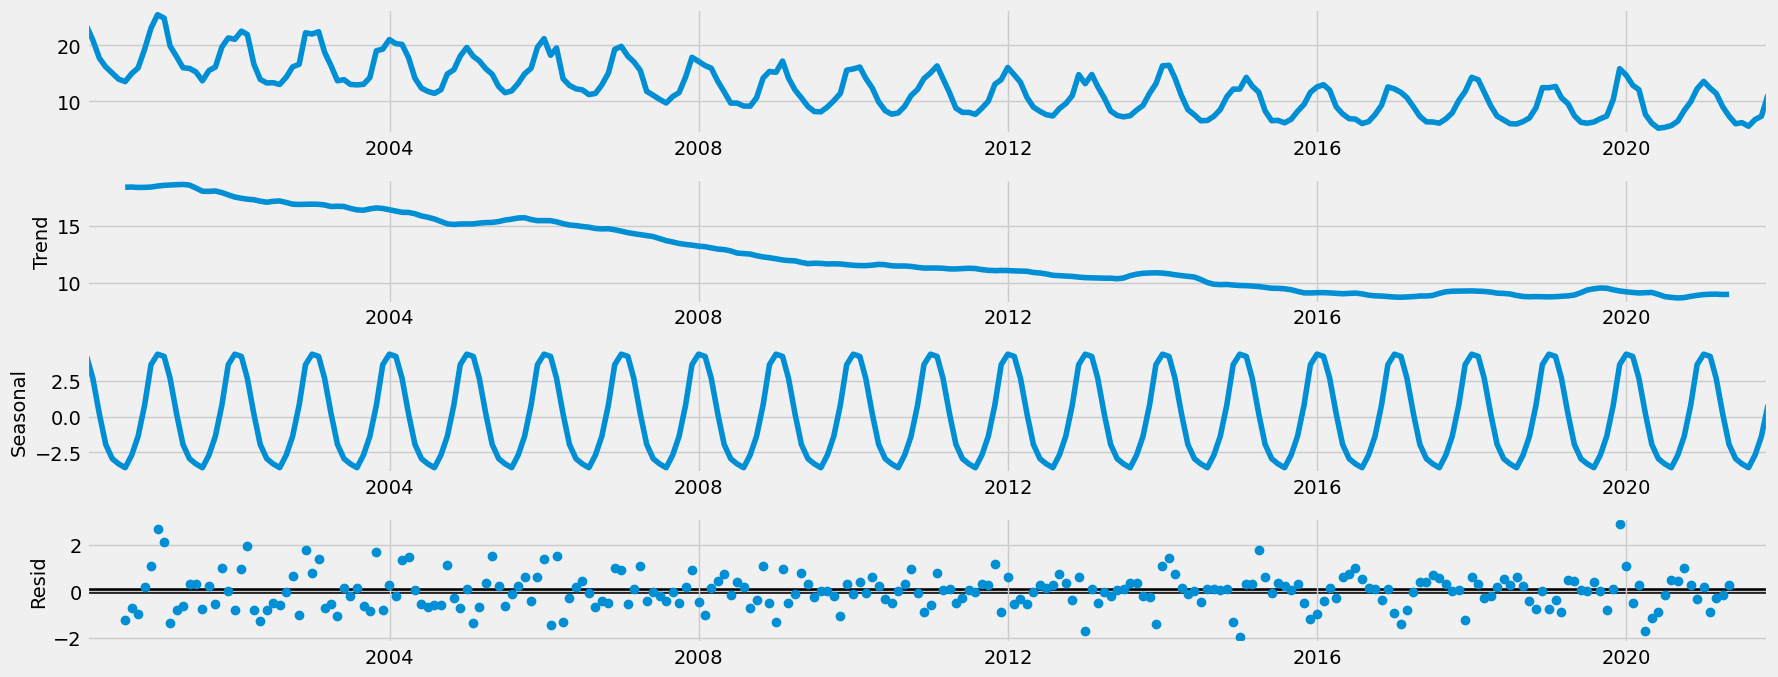

In [34]:
# Plot the separate components

decomposition.plot()
plt.show()

# 4. Testing for stationarity

In [35]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_2['O3 Mean'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.537612
p-value                          0.106589
Number of Lags Used             14.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


### Test-Statistic is more than Critical Value, meaning the data is non-stationary.

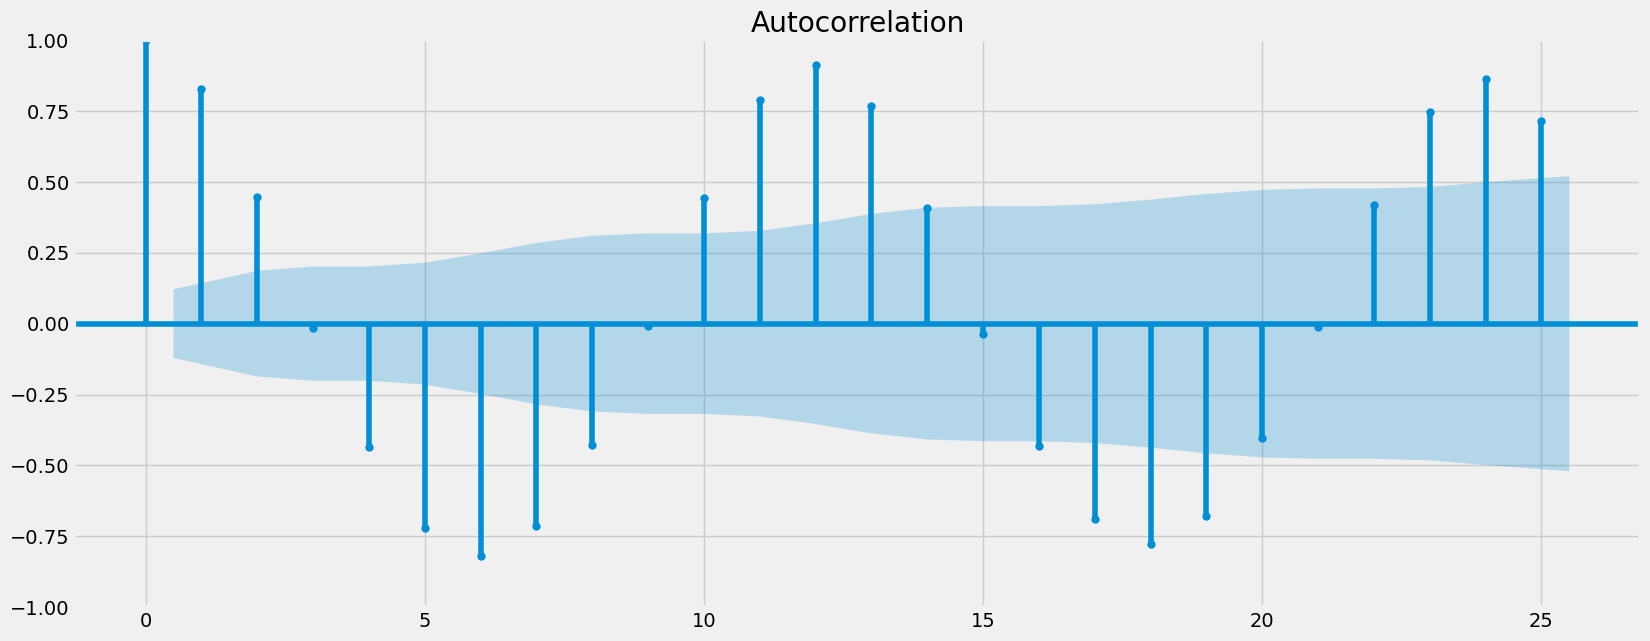

In [36]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_2)
plt.show()

In [37]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_3['CO Mean'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.134724
p-value                          0.230783
Number of Lags Used             15.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


### Test-Statistic is more than Critical Value, meaning the data is non-stationary.

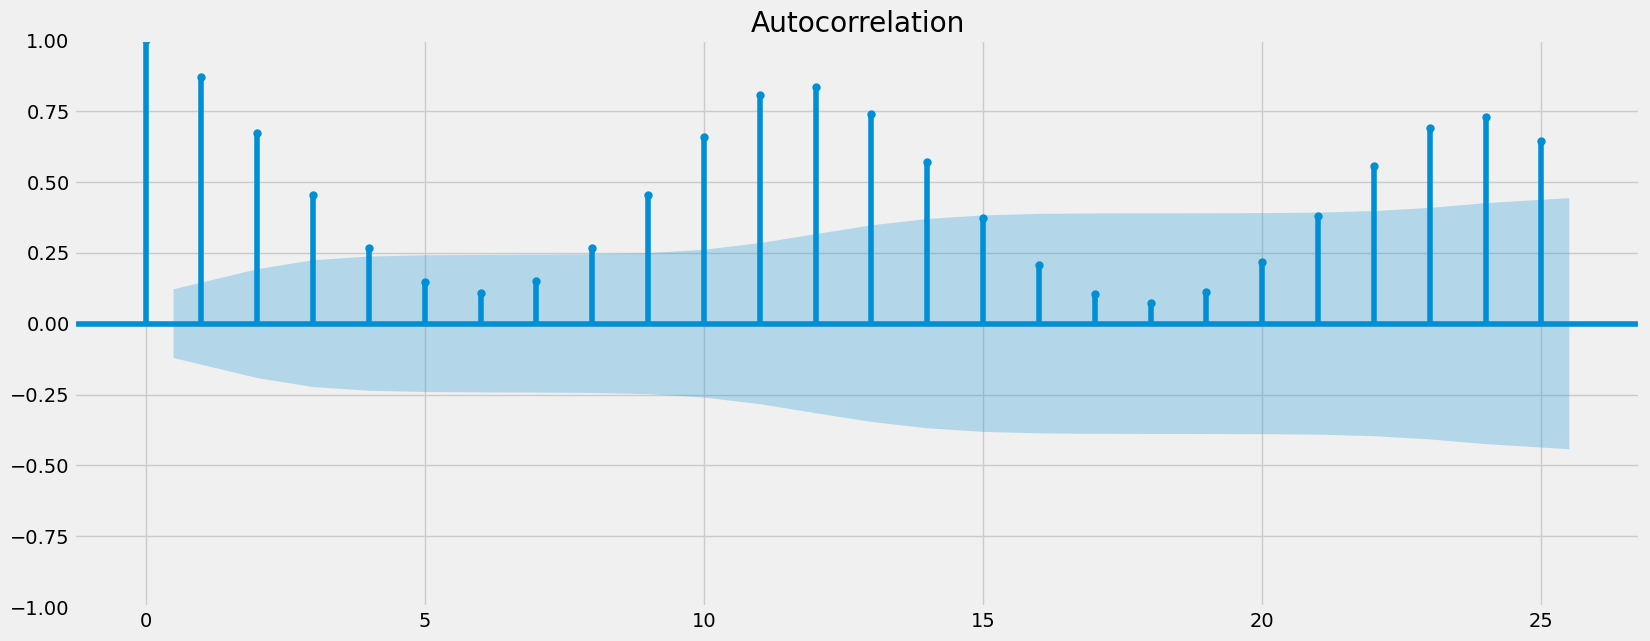

In [38]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_3)
plt.show()

In [39]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_4['SO2 Mean'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.141409
p-value                          0.228193
Number of Lags Used             14.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


### Test-Statistic is more than Critical Value, meaning the data is non-stationary.

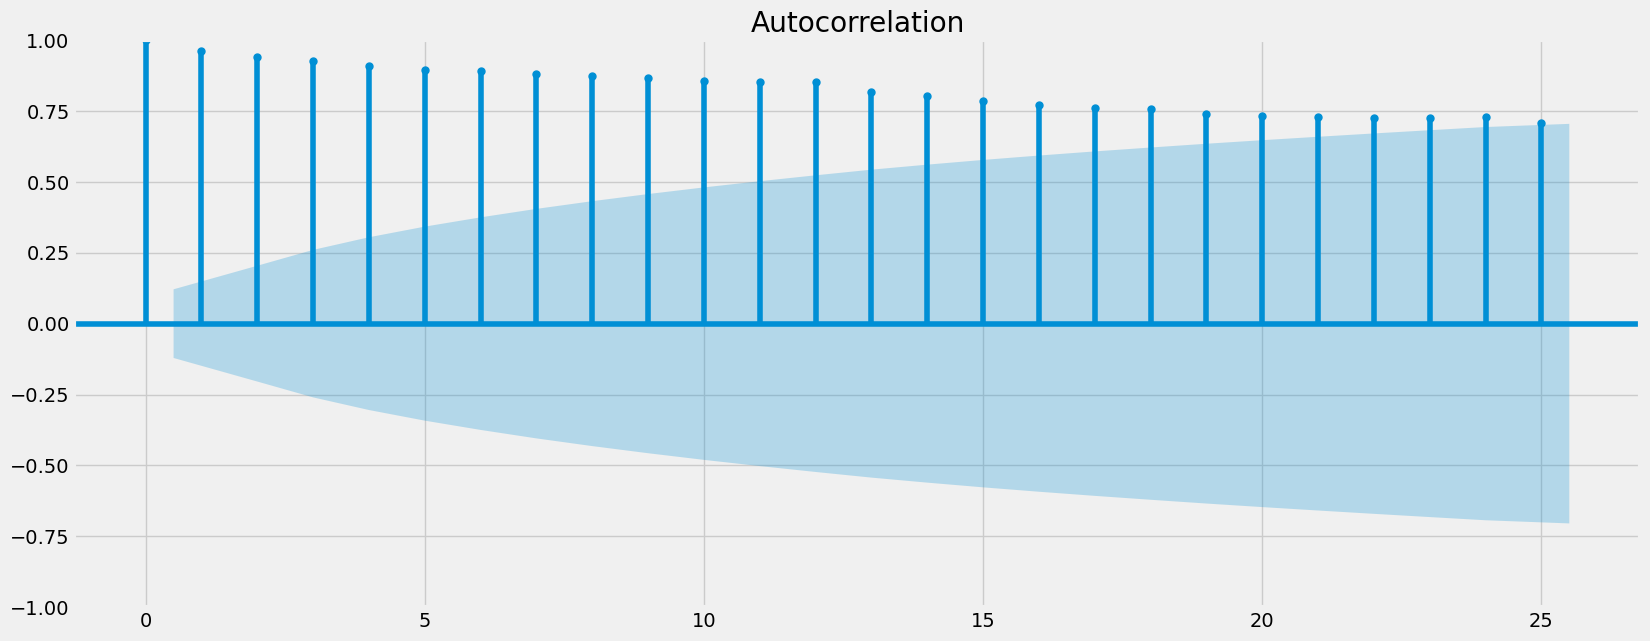

In [40]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_4)
plt.show()

In [41]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_5['NO2 Mean'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.095015
p-value                          0.246524
Number of Lags Used             15.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


### Test-Statistic is more than Critical Value, meaning the data is non-stationary.

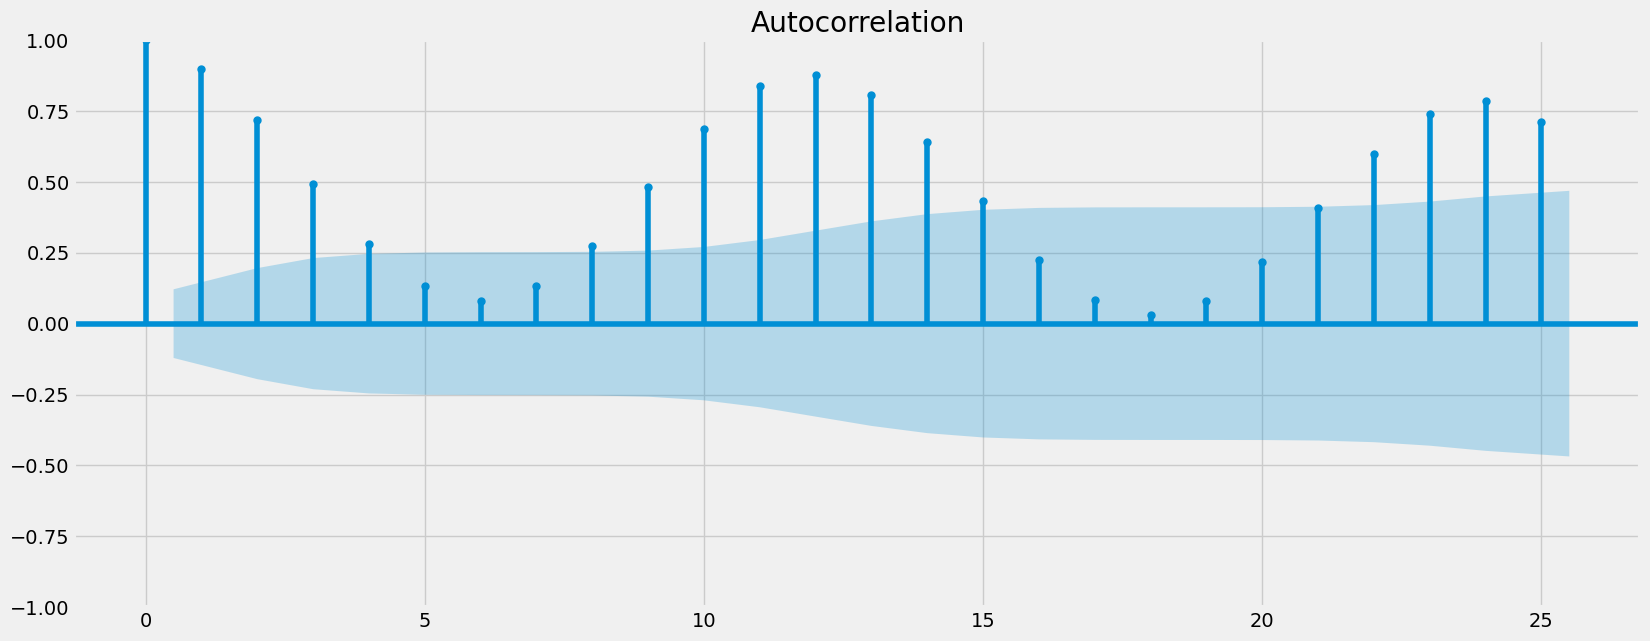

In [42]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_5)
plt.show()

# 5. Stationarizing the data

In [43]:
df_diff_2 = df_2 - df_2.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [44]:
df_diff_2.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [45]:
df_diff_2.head()

,O3 Mean
Date,
2000-02-29,0.006603
2000-03-31,0.005949
2000-04-30,0.003592
2000-05-31,0.003886
2000-06-30,-0.000958


In [46]:
df_diff_2.columns

Index(['O3 Mean'], dtype='object')

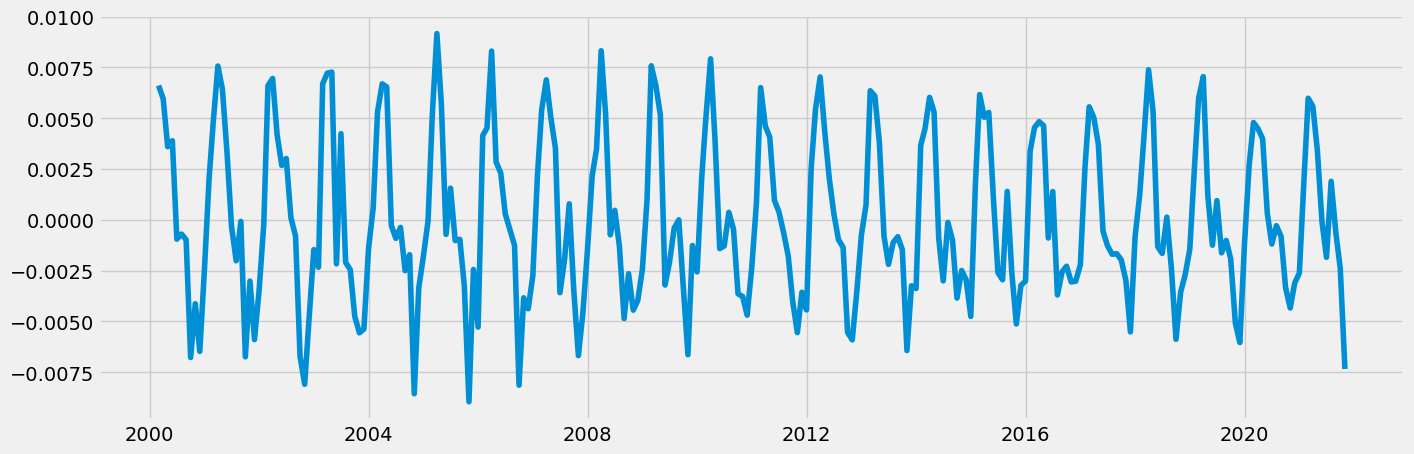

In [47]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff_2)

In [48]:
dickey_fuller(df_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                -6.377815e+00
p-value                        2.260910e-08
Number of Lags Used            1.300000e+01
Number of Observations Used    2.470000e+02
Critical Value (1%)           -3.457105e+00
Critical Value (5%)           -2.873314e+00
Critical Value (10%)          -2.573044e+00
dtype: float64


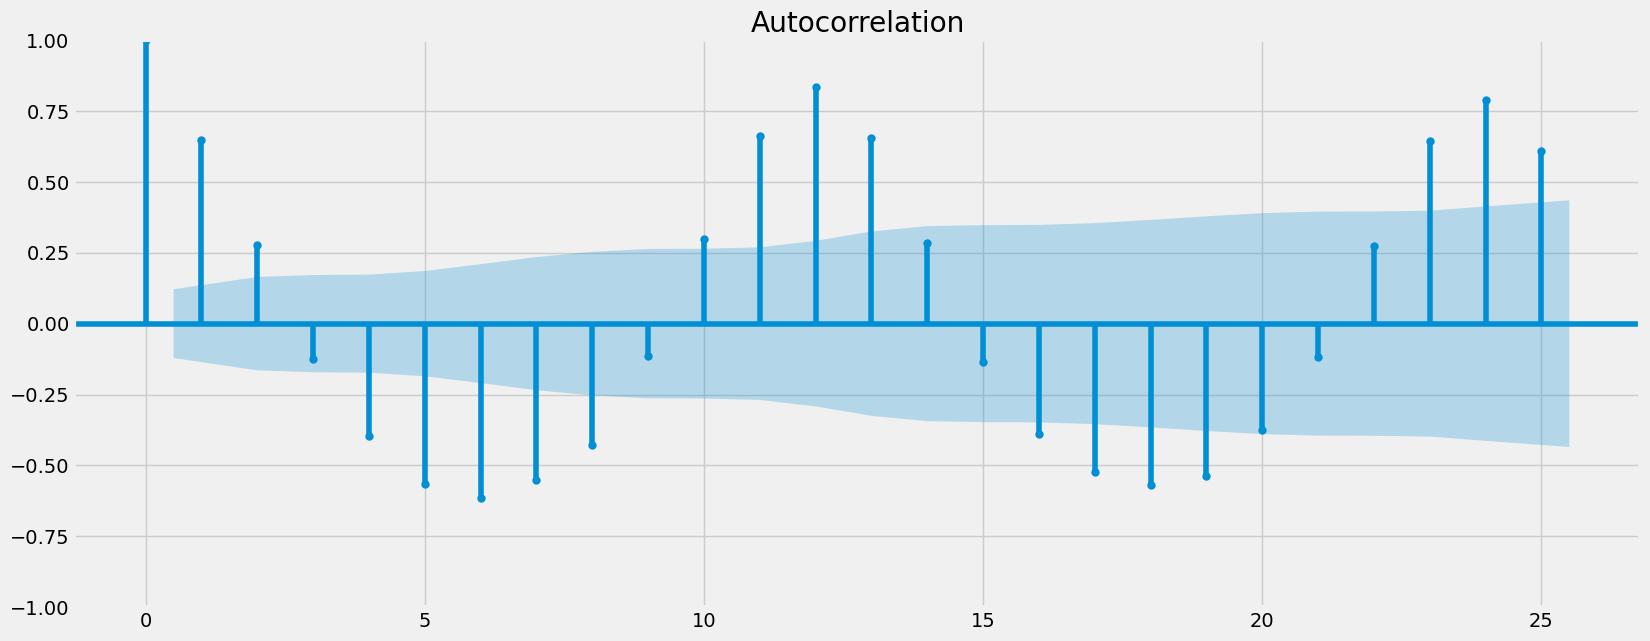

In [49]:
plot_acf(df_diff_2)
plt.show()

### After stationarizing the data, the Test-Statistic is less than Critical Value, meaning we can reject null hypothesis and accept alternative hypothesis.

In [50]:
df_diff_3 = df_3 - df_3.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [51]:
df_diff_3.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [52]:
df_diff_3.head()

,CO Mean
Date,
2000-02-29,-0.232723
2000-03-31,-0.177929
2000-04-30,-0.068595
2000-05-31,-0.047588
2000-06-30,-0.012627


In [53]:
df_diff_3.columns

Index(['CO Mean'], dtype='object')

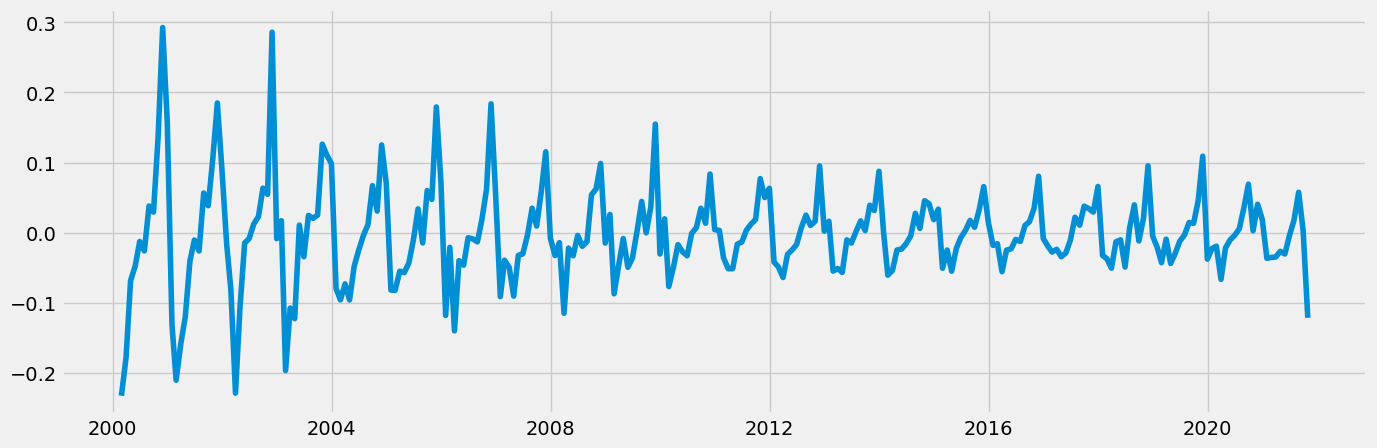

In [54]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff_3)

In [55]:
dickey_fuller(df_diff_3)

Dickey-Fuller Stationarity test:
Test Statistic                  -4.070485
p-value                          0.001083
Number of Lags Used             14.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


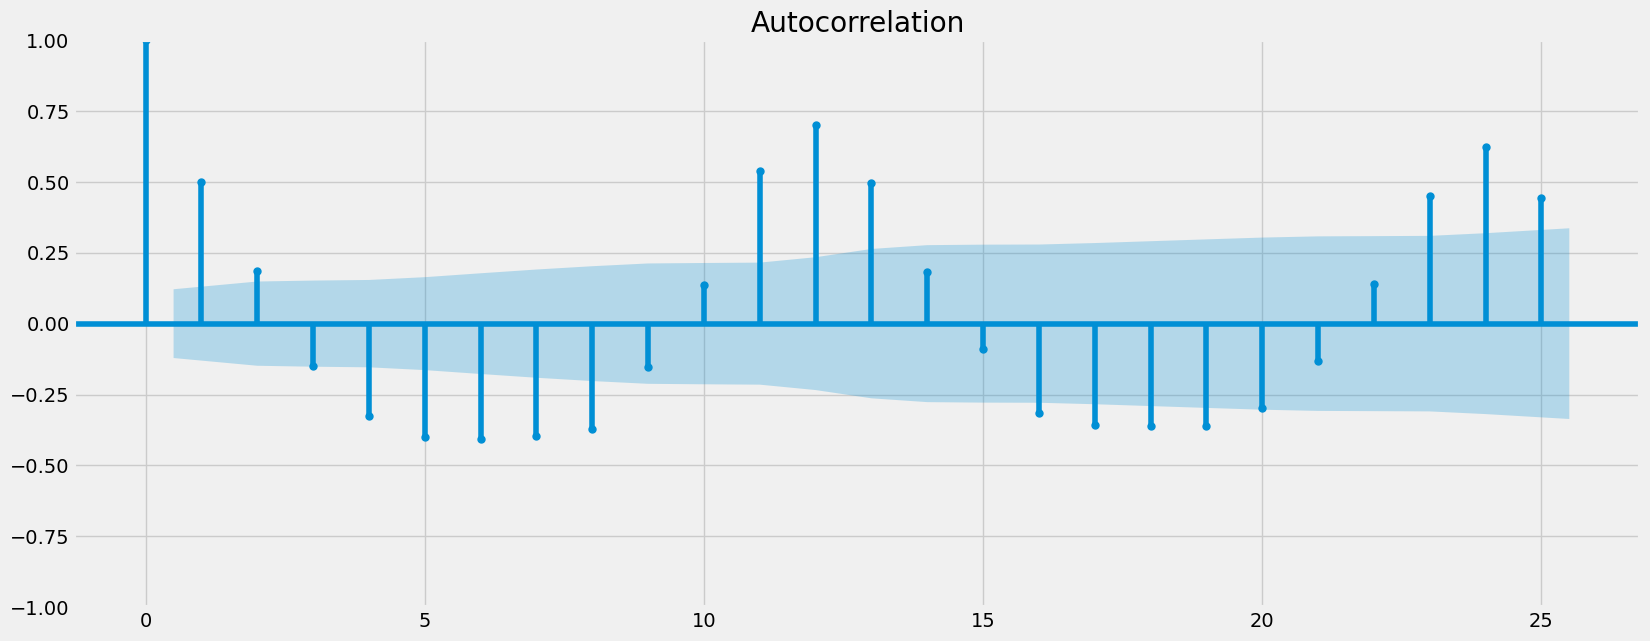

In [56]:
plot_acf(df_diff_3)
plt.show()

### After stationarizing the data, the Test-Statistic is less than Critical Value, meaning we can reject null hypothesis and accept alternative hypothesis.

In [57]:
df_diff_4 = df_4 - df_4.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [58]:
df_diff_4.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [59]:
df_diff_4.head()

,SO2 Mean
Date,
2000-02-29,-0.440584
2000-03-31,-0.264493
2000-04-30,0.215325
2000-05-31,0.012637
2000-06-30,-0.054434


In [60]:
df_diff_4.columns

Index(['SO2 Mean'], dtype='object')

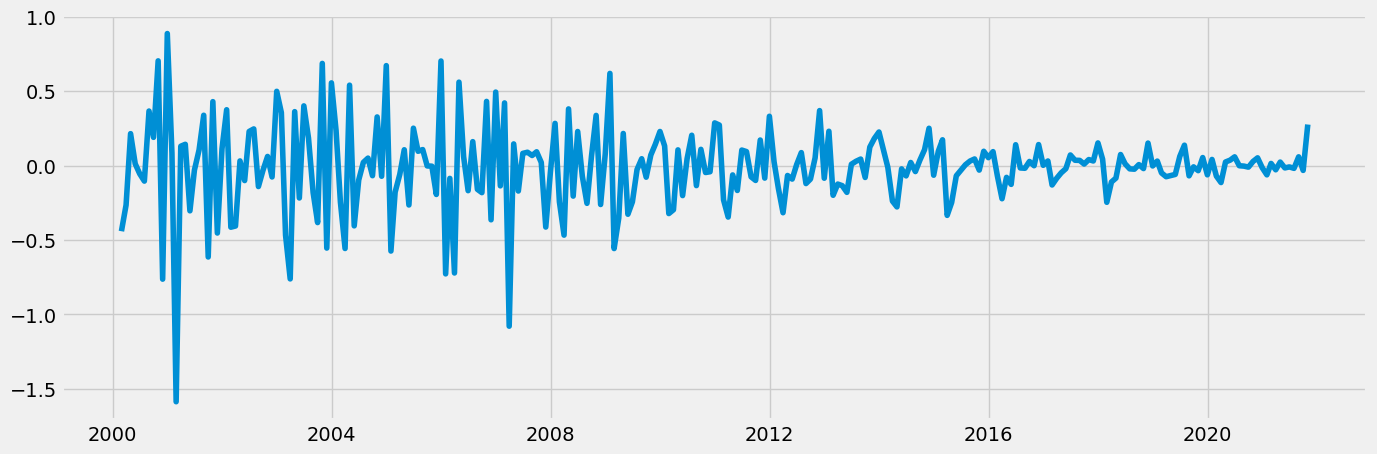

In [61]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff_4)

In [62]:
dickey_fuller(df_diff_4)

Dickey-Fuller Stationarity test:
Test Statistic                  -4.546889
p-value                          0.000162
Number of Lags Used             13.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


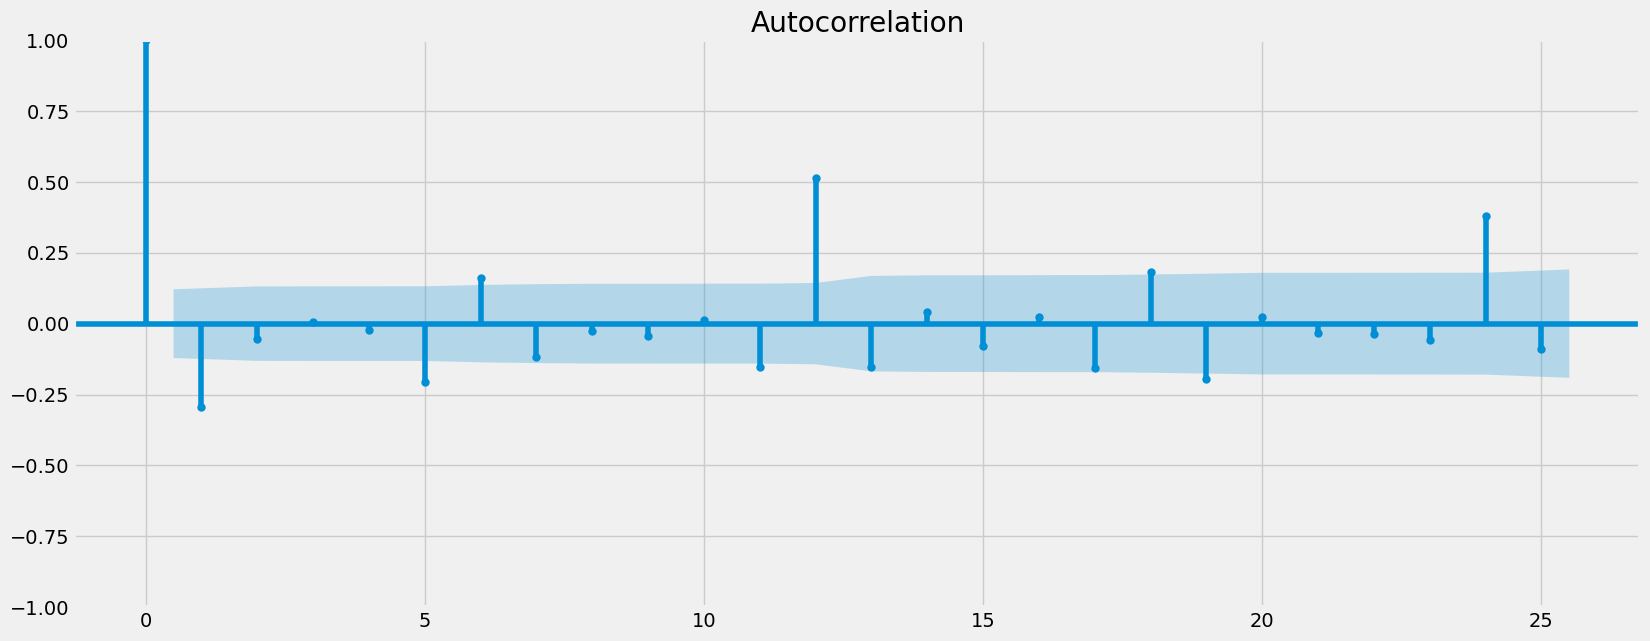

In [63]:
plot_acf(df_diff_4)
plt.show()

### After stationarizing the data, the Test-Statistic is less than Critical Value, meaning we can reject null hypothesis and accept alternative hypothesis.

In [64]:
df_diff_5 = df_5 - df_5.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [65]:
df_diff_5.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [66]:
df_diff_5.head()

,NO2 Mean
Date,
2000-02-29,-2.464881
2000-03-31,-3.244510
2000-04-30,-1.574649
2000-05-31,-1.109294
2000-06-30,-1.091900


In [67]:
df_diff_5.columns

Index(['NO2 Mean'], dtype='object')

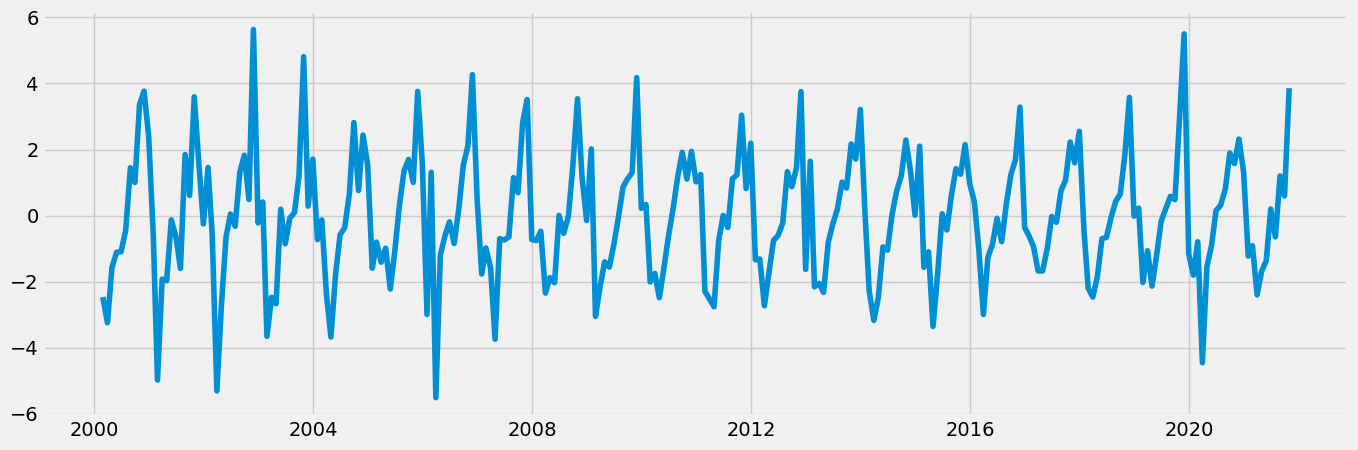

In [68]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff_5)

In [69]:
dickey_fuller(df_diff_5)

Dickey-Fuller Stationarity test:
Test Statistic                  -4.908150
p-value                          0.000034
Number of Lags Used             14.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


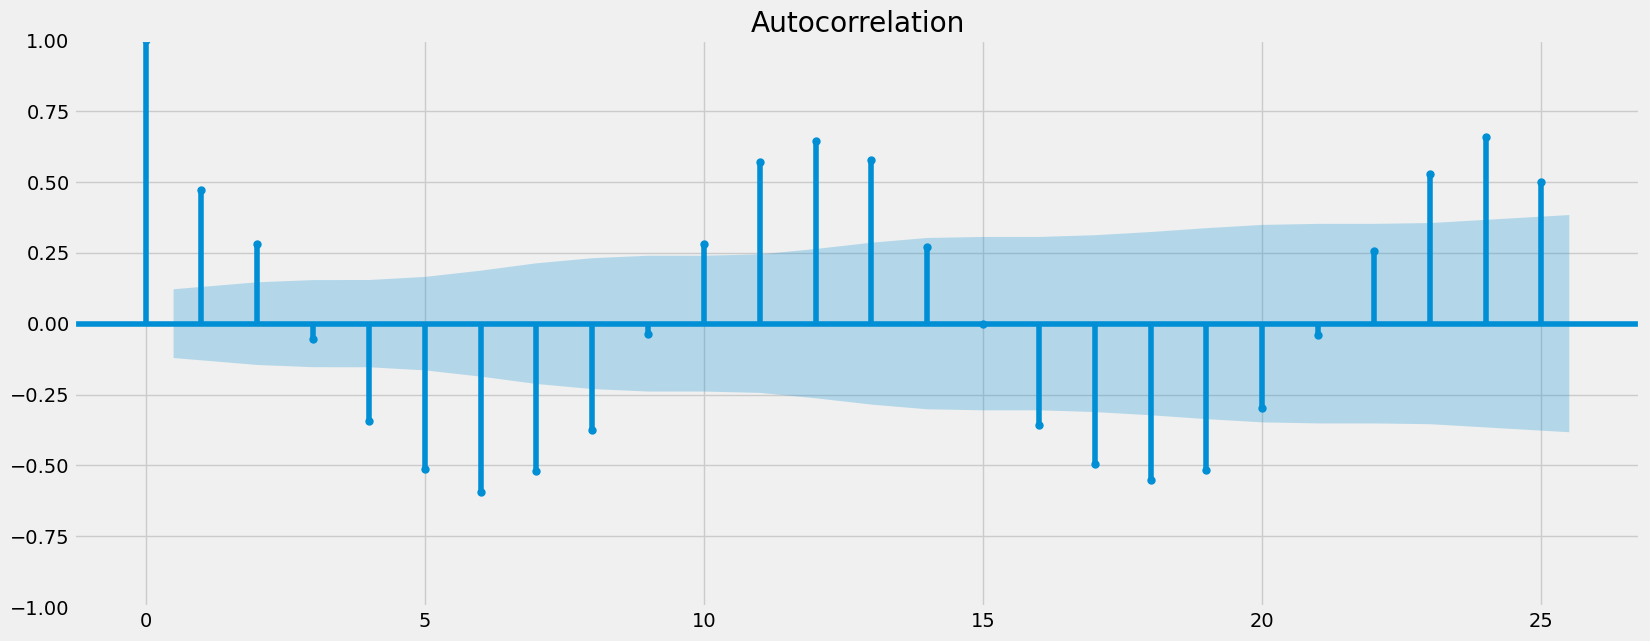

In [70]:
plot_acf(df_diff_5)
plt.show()

### After stationarizing the data, the Test-Statistic is less than Critical Value, meaning we can reject null hypothesis and accept alternative hypothesis.

## Although there are a few lags in each graph, the data is more stationary than it was before. 